In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Load your trained model
model = load_model('../models/emotion_model.h5') 

# Load your data generators (you might need to rerun your data loading code)
import sys
import os
sys.path.append((os.path.abspath('../src')))

from data_loader import load_data
train_gen, test_gen = load_data('../data/archive')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


  1/225 ━━━━━━━━━━━━━━━━━━━━ 52s 233ms/step

/Users/donjoe/Documents/faceExpression/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step


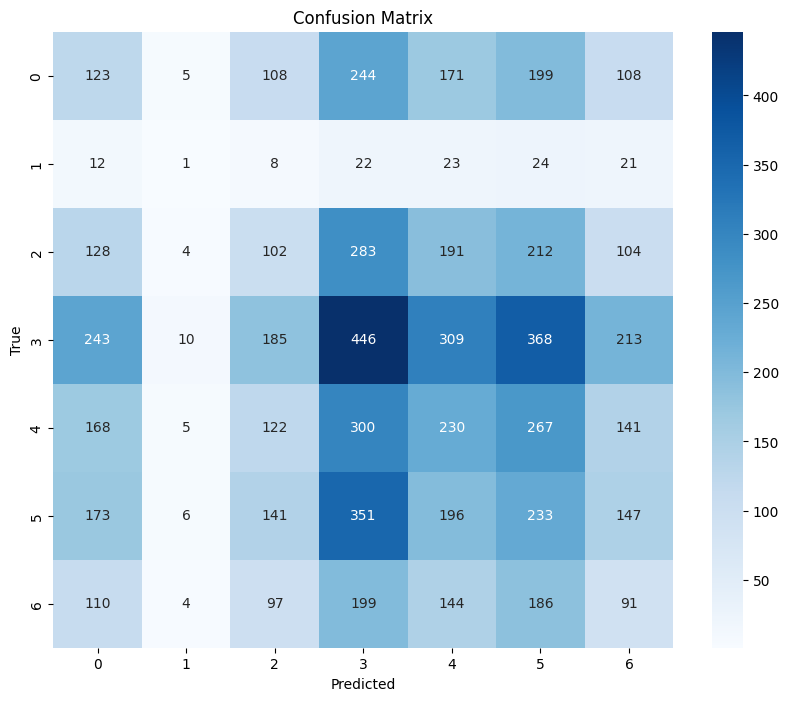

225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step
              precision    recall  f1-score   support

       angry       0.13      0.13      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.13      0.10      0.11      1024
       happy       0.25      0.26      0.26      1774
     neutral       0.18      0.18      0.18      1233
         sad       0.19      0.22      0.20      1247
    surprise       0.13      0.13      0.13       831

    accuracy                           0.18      7178
   macro avg       0.14      0.15      0.14      7178
weighted avg       0.18      0.18      0.18      7178

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


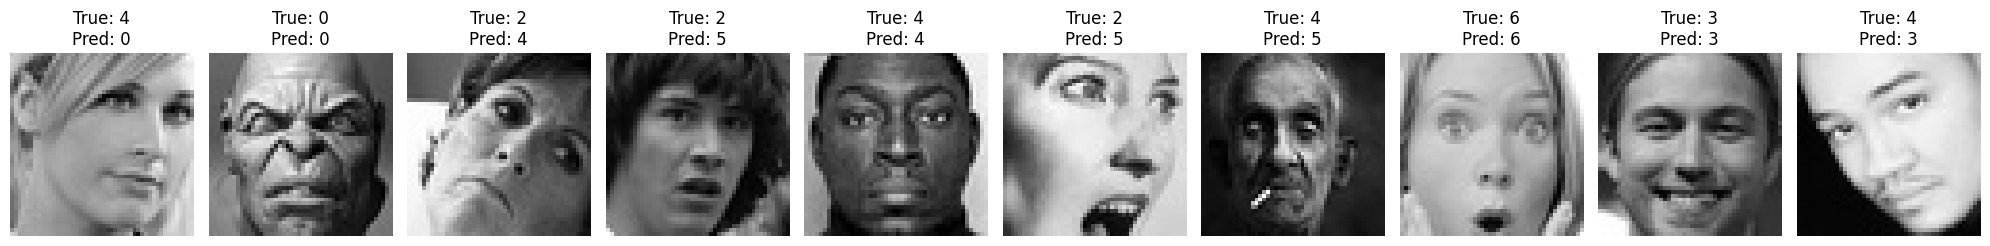

In [5]:
def plot_confusion_matrix(model, test_generator):
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def print_classification_report(model, test_generator):
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    
    class_names = list(test_generator.class_indices.keys())
    print(classification_report(y_true, y_pred, target_names=class_names))

def visualize_predictions(model, test_generator, num_samples=10):
    images, labels = next(test_generator)
    predictions = model.predict(images)
    
    plt.figure(figsize=(20, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        true_label = np.argmax(labels[i])
        pred_label = np.argmax(predictions[i])
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Now you can use these functions

# Plot confusion matrix
plot_confusion_matrix(model, test_gen)

# Print classification report
print_classification_report(model, test_gen)

# Visualize sample predictions
visualize_predictions(model, test_gen)